sortpython elementi   1000   tempo esecuzione = 0.000000
heapSort elementi   1000   tempo esecuzione = 0.017017
mergeSort elementi   1000   tempo esecuzione = 0.016603
quickSort elementi   1000   tempo esecuzione = 0.002380
sortpython elementi  10000   tempo esecuzione = 0.000000
heapSort elementi  10000   tempo esecuzione = 0.097195
mergeSort elementi  10000   tempo esecuzione = 0.170579
quickSort elementi  10000   tempo esecuzione = 0.041522
sortpython elementi 100000   tempo esecuzione = 0.044774
heapSort elementi 100000   tempo esecuzione = 2.240682
mergeSort elementi 100000   tempo esecuzione = 2.096244
quickSort elementi 100000   tempo esecuzione = 0.985610
sortpython elementi 500000   tempo esecuzione = 0.267554
heapSort elementi 500000   tempo esecuzione = 17.106575
mergeSort elementi 500000   tempo esecuzione = 11.796206
quickSort elementi 500000   tempo esecuzione = 5.227398


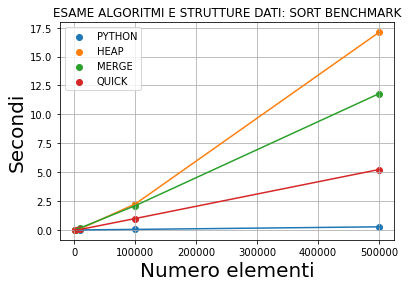

In [1]:
import random
import time 
import matplotlib.pyplot as plt


def grafico(Lx, Lpy, Lheap, Lmerge, Lquick):

#GRAFICO

	fig, ax = plt.subplots()
	ax.scatter( Lx[1:],Lpy[1:], label = Lpy [0])
	ax.scatter( Lx[1:],Lheap[1:],label = Lheap [0])
	ax.scatter( Lx[1:],Lmerge[1:], label = Lmerge[0])
	ax.scatter( Lx[1:],Lquick[1:], label = Lquick [0])
	ax.plot( Lx[1:],Lpy[1:])
	ax.plot( Lx[1:],Lheap[1:])
	ax.plot( Lx[1:],Lmerge[1:]) 
	ax.plot( Lx[1:],Lquick[1:])

	ax.set_ylabel( 'Secondi' ,fontsize=20)
	ax.set_xlabel('Numero elementi', fontsize=20)
	ax.set_title('ESAME ALGORITMI E STRUTTURE DATI: SORT BENCHMARK')
	ax.grid(True)
	ax.legend ()
	plt.show()



#LISTA RANDOMICA

def lista_random(seme,n):
	L=[]
	random.seed(seme)
	for i in range(n):
		L.append(random.randrange(100000000))   #range massimo 
	return L
#------------------------------------------------------------------------------

#RICORSIONE

def heapify(arr, n, i):    
	largest = i            #nodo padre
	l = 2 * i + 1	       #left 
	r = 2 * i + 2	       #right 

	#guarda se nodo sx è compreso nell'array; se root è minore di l: scambio
	if l < n and arr[largest] < arr[l]:
		largest = l

	#guarda se nodo dx è compreso nell'array; se root è minore di r: scambio
	if r < n and arr[largest] < arr[r]:
		largest = r

	if largest != i:
		arr[i], arr[largest] = arr[largest], arr[i] #scambio

		# Heapify the root.
		heapify(arr, n, largest)

def heapSort(arr):
	n = len(arr)

	#loop principale inizio da metà array verso 0
	for i in range(n//2 - 1, -1, -1):
		heapify(arr, n, i)

	#estraggo elementi uno alla volta 
	for i in range(n-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i] # swap
		heapify(arr, i, 0)
#----------------------------------------------------------------------------------------
def merge(array, l, m, r):
    n1 = m - l + 1
    n2 = r- m
  
    #array temporanri 
    L = [0] * (n1)
    R = [0] * (n2)
  
    for i in range(0 , n1):
        L[i] = array[l + i]
  
    for j in range(0 , n2):
        R[j] = array[m + 1 + j]
  
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
  
    while i < n1 and j < n2 :
        if L[i] <= R[j]:
            array[k] = L[i]
            i += 1
        else:
            array[k] = R[j]
            j += 1
        k += 1
  
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        array[k] = L[i]
        i += 1
        k += 1
  
    # Copy the remaining elements of R[], if there are any
    
    while j < n2:
        array[k] = R[j]
        j += 1
        k += 1
  
    #l is for left index and r is right index of the
    # sub-array of arr to be sorted
def mergeSort(array,l,r):
    if l < r:
        m = (l+(r-1))//2
  
        # Sort first and second halves
        mergeSort(array, l, m)
        mergeSort(array, m+1, r)
        merge(array, l, m, r)
#------------------------------------------------------------------------------------
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
  
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
  
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

def partition(arr, low, high):
    i = (low-1)         # indice dell'elemento più piccolo
    pivot = arr[high]   # pivot
  
    for j in range(low, high):
  
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
  
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
  
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

#-----------------------------------------------------------------------------------------------
#                                           MAIN
#-----------------------------------------------------------------------------------------------
Lx = ['ELEMENTI']  #numero elementi 
Lpy = ['PYTHON']
Lheap = ['HEAP']
Lmerge = ['MERGE']
Lquick = ['QUICK']
Nloop = [1000, 10000, 100000,500000]


for N in Nloop: 
	Lx.append(N)

    #SORTPYTHON
	#print(lista_random(1111,1000))
	A = lista_random(1111,N)
	T0 = time.time()
	A.sort()
	T1 = time.time()-T0
	print('sortpython elementi %6d   tempo esecuzione = %f'%(N,T1))
	Lpy.append(T1)

    #HEAP
    
	A = lista_random(1111,N)
	T0 = time.time()
	heapSort(A)
	T1 = time.time()-T0
	print('heapSort elementi %6d   tempo esecuzione = %f'%(N,T1))
	Lheap.append(T1)

    #MERGE
    
	A = lista_random(1111,N) 
	T0 = time.time()
	mergeSort(A, 0, N-1) 
	T1 = time.time()-T0
	print('mergeSort elementi %6d   tempo esecuzione = %f'%(N,T1))
	Lmerge.append(T1)

    #QUICK
    
	A = lista_random(1111,N) 
	T0 = time.time()
	quickSort(A, 0, N-1) 
	T1 = time.time()-T0
	print('quickSort elementi %6d   tempo esecuzione = %f'%(N,T1))
	Lquick.append(T1)


grafico(Lx, Lpy, Lheap, Lmerge, Lquick)